<a href="https://colab.research.google.com/github/DaavidUc/CodigosFinancieros/blob/main/Normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalidad de las Series Financieras

En finanzas, es común asumir que los rendimientos siguen una distribución normal, sin embargo, ¿Esto es correcto? Para comprobar este supuesto, se utilizarán datos de algunas acciones y pruebas de hipótesis. 

Importamos las librerías necesarias. 

In [3]:
#pip install yfinance

In [4]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import numpy as np

Utilizaremos los datos de los últimos 5 años. Ya que esto corresponde a un ciclo financiero completo. 

In [5]:
hoy = date.today()

inicio = hoy - relativedelta(years=5)

Descargamos los datos para el periodo seleccionado.

In [6]:
datos = yf.download('AAPL MSFT AMZN TSLA NFLX FB',inicio, hoy)['Adj Close']


[*********************100%***********************]  6 of 6 completed


Obtenemos los rendimientos logaritmicos y los rendimientos acumulados 

In [7]:
rendimientos_logaritmicos = np.log(datos)-np.log(datos.shift(1)) 

rendimientos_acumulados = rendimientos_logaritmicos.cumsum()

La distribución empírica de los rendimientos se observa de la siguiente forma

Text(0.5, 1.0, 'Distribución empírica: Apple')

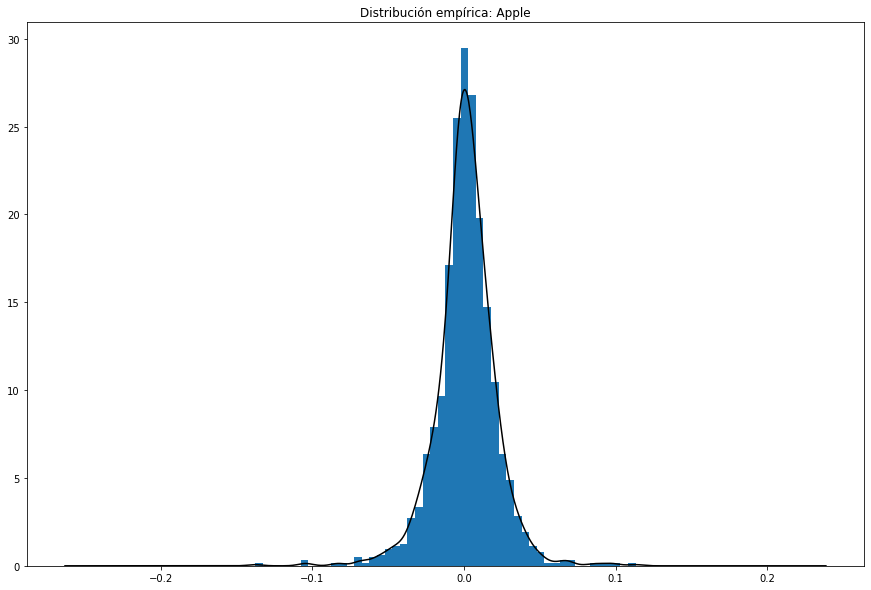

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(rendimientos_logaritmicos['AAPL'], bins=50, density=1)
rendimientos_logaritmicos['AAPL'].plot(kind='kde', c='black', label='Distribución Empírica')
ax.set_ylabel('')
ax.set_title('Distribución empírica: Apple')


Ahora, se obtendrá el rendimiento promedio y la volatilidad de los activos seleccionados. 

In [63]:
medias = pd.DataFrame()
medias['Diaria'] = rendimientos_logaritmicos.mean()

volatilidades = pd.DataFrame()
volatilidades['Diaria'] = rendimientos_logaritmicos.std()

Se genera una distribución normal utilizando como parámetros la media y la volatilidad de la distribución empírica de resultados. Esta distribución va de -5 a 5 desviaciones estandar. 

In [13]:
x = np.linspace(medias['Diaria']['AAPL'] - 5*volatilidades['Diaria']['AAPL'], medias['Diaria']['AAPL'] + 5*volatilidades['Diaria']['AAPL'], 1260)

fitted_data = norm.pdf(x, medias['Diaria']['AAPL'], volatilidades['Diaria']['AAPL'])

Ahora, comparamos la distribución empírica de rendimientos de Apple con la distribución normal. 

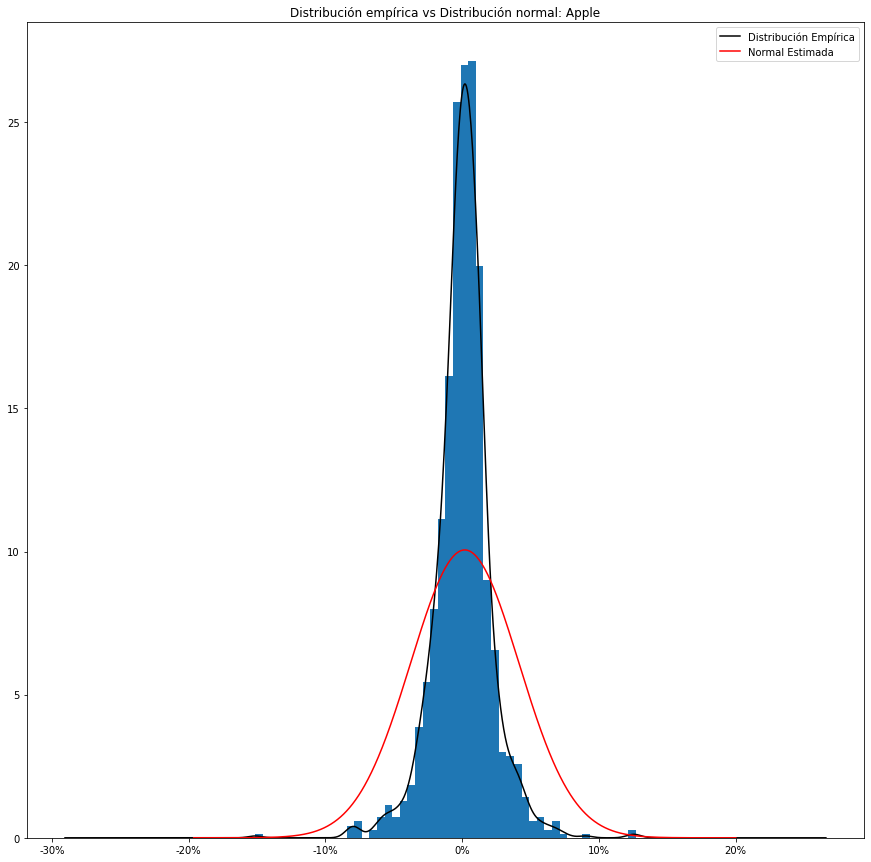

In [64]:
fig, ax = plt.subplots(figsize = (15,15))

ax.hist(rendimientos_logaritmicos['AMZN'], bins=50, density = 1)
rendimientos_logaritmicos['AMZN'].plot(kind='kde', c='black', label='Distribución Empírica')
plt.plot(x, fitted_data, 'r-', label='Normal Estimada')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,symbol = '%'))
ax.set_title('Distribución empírica vs Distribución normal: Apple')
ax.set_ylabel('')
ax.legend()

Como se puede observar, en la distribución empírica hay una mayor concentración de datos en el centro, es decir, existe leptocurtosis. Así mismo, en las colas, se observa una mayor cantidad de datos. Observaremos si se cumple esto para los demás activos. 

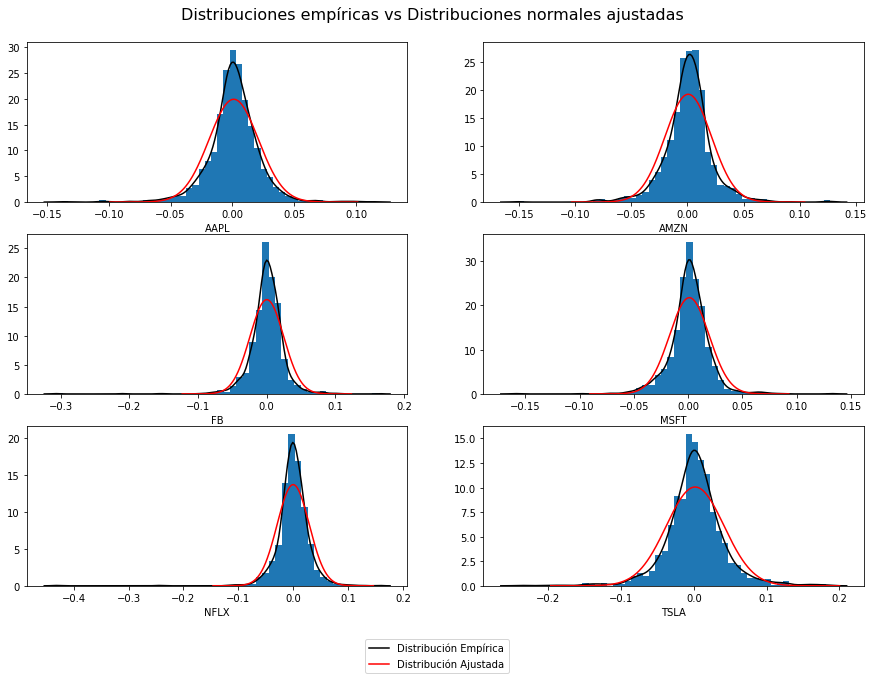

In [61]:
fig, ax = plt.subplots(3,2, figsize=(15,10))
fig.suptitle('Distribuciones empíricas vs Distribuciones normales ajustadas', y=0.93, size=16)
ax= ax.ravel()
for i, tag in enumerate(rendimientos_logaritmicos.columns):
    ax[i].hist(rendimientos_logaritmicos[tag], bins=50, density=1)
    sns.kdeplot(ax=ax[i], x = rendimientos_logaritmicos[tag], legend=False, label='Distribución Empírica', c='black')

    x = np.linspace(medias['Diaria'][tag] - 5*volatilidades['Diaria'][tag], medias['Diaria'][tag] + 5*volatilidades['Diaria'][tag], 1260)
    fitted_data = norm.pdf(x, medias['Diaria'][tag], volatilidades['Diaria'][tag])

    ax[i].plot(x, fitted_data, '-r', label='Distribución Ajustada')
    ax[i].set_ylabel('')

    handles, labels = ax[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')


Se puede observar que, en todos los activos se tiene leptocurtosis, así mismo, se observa que se tienen colas más pesadas en las distribuciones empíricas. Existe una otra forma de comparar las distribuciones de rendimientos con una distribución normal, esta es utilizando la gráfica QQ-Norm. 